In [17]:
import matplotlib.pyplot as plt

import numpy as np

import keras

from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from keras import optimizers as optimizers

from keras.utils.np_utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator #para data augmentation

from PIL import Image

In [2]:
#carrega o banco de dados do mnist

(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [3]:
#xTrain
#len(xTrain)
#xTrain.shape
#yTrain
#yTrain.shape

In [4]:
#One-hot encoding
yTeste = to_categorical(yTest)
yTreino = to_categorical(yTrain)
print(yTreino[0])
print(yTreino[1])
print(yTreino[2])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [5]:
#visualizando exemplo de imagem

data = xTrain[0]
img = Image.fromarray(data, 'L') #'L' para imagem em escala de cinza (8-bit)

#img

In [6]:
w, h = 32,32
img = img.resize((w,h), Image.ANTIALIAS)
img

a = np.asarray(img)

img = Image.fromarray(a, 'L') #'L' para imagem em escala de cinza (8-bit)
#img

In [7]:
#ajuste das dimensões das imagens de treino

w, h = 32, 32

auxList = []

for i in range(len(xTrain)):
    
    img = Image.fromarray(xTrain[i], 'L') #'L' para imagem em escala de cinza (8-bit)

    img = img.resize((w,h), Image.ANTIALIAS)
    
    auxList.append(np.asarray(img))

xTreino = np.array(auxList)        
#xTreino.shape

xTreino = xTreino.reshape((60000,32,32,1))

In [8]:
np.array_equal(xTreino[0], xTreino[3])

False

In [9]:
#ajuste das dimensões das imagens de teste

w, h = 32, 32

auxList = []

for i in range(len(xTest)):
    
    img = Image.fromarray(xTest[i], 'L') #'L' para imagem em escala de cinza (8-bit)

    img = img.resize((w,h), Image.ANTIALIAS)

    auxList.append(np.asarray(img))

xTeste = np.array(auxList)
#xTeste.shape

xTeste = xTeste.reshape((10000, 32, 32, 1))

In [10]:
'''#visualizando exemplo de imagem

data = xTreino[0]
img = Image.fromarray(data, 'L') #'L' para imagem em escala de cinza (8-bit)

#print(data.shape)
img'''

"#visualizando exemplo de imagem\n\ndata = xTreino[0]\nimg = Image.fromarray(data, 'L') #'L' para imagem em escala de cinza (8-bit)\n\n#print(data.shape)\nimg"

In [11]:
def leNet():
    
    classificador = Sequential()
    
    #imagem 32x32
    #Camada convolucional 1
    classificador.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', kernel_initializer='random_uniform', input_shape = (32,32,1)))
    
    classificador.add(Dropout(rate = 0.3))
    
    #imagem 28x28
    #Camada de pooling 1
    classificador.add(MaxPooling2D(pool_size = 2, strides = 2))
    #classificador.add(AveragePooling2D(pool_size = 2, strides = 2))
    
    #imagem 14x14
    #Camada convolucional 2
    classificador.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', kernel_initializer='random_uniform', input_shape = (14,14,6)))
    
    classificador.add(Dropout(rate = 0.3))
    
    #imagem 10x10
    #Camada de pooling 2
    classificador.add(MaxPooling2D(pool_size = 2, strides = 2))
    #classificador.add(AveragePooling2D(pool_size = 2, strides = 2))
    
    #imagem 5x5
    #Flatten
    classificador.add(Flatten())
    
    #Camada totalmente conectada 1
    classificador.add(Dense(units = 120, activation = 'relu', kernel_initializer='random_uniform'))
    
    classificador.add(Dropout(rate = 0.3))
    
    #Camada totalmente conectada 2
    classificador.add(Dense(units = 84, activation = 'relu',  kernel_initializer='random_uniform'))
    
    classificador.add(Dropout(rate = 0.3))
    
    #Camada de saída
    classificador.add(Dense(units = 10, activation = 'softmax',  kernel_initializer='random_uniform'))
    
    adam = optimizers.Adam(lr=0.001, decay=0.00001)
    #sgd = optimizers.SGD(lr=0.1, decay=0.01)
    
    classificador.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return  classificador

In [12]:
model = leNet()
#print(xTreino.shape)
history = model.fit(xTreino, yTreino, validation_split=0.16665, epochs=50, batch_size=400, initial_epoch=-1)

Train on 50001 samples, validate on 9999 samples
Epoch 0/50
50001/50001 [==============================] - 49s 974us/step - loss: 0.9070 - acc: 0.6975 - val_loss: 0.3758 - val_acc: 0.9528
Epoch 1/50
50001/50001 [==============================] - 47s 941us/step - loss: 0.2906 - acc: 0.9173 - val_loss: 0.2151 - val_acc: 0.9774
Epoch 2/50
50001/50001 [==============================] - 47s 944us/step - loss: 0.2024 - acc: 0.9460 - val_loss: 0.1542 - val_acc: 0.9801
Epoch 3/50
50001/50001 [==============================] - 43s 866us/step - loss: 0.1702 - acc: 0.9541 - val_loss: 0.1313 - val_acc: 0.9832
Epoch 4/50
50001/50001 [==============================] - 45s 898us/step - loss: 0.1490 - acc: 0.9593 - val_loss: 0.1101 - val_acc: 0.9854
Epoch 5/50
50001/50001 [==============================] - 43s 865us/step - loss: 0.1344 - acc: 0.9637 - val_loss: 0.1030 - val_acc: 0.9867
Epoch 6/50
50001/50001 [==============================] - 42s 847us/step - loss: 0.1273 - acc: 0.9663 - val_loss: 0.0

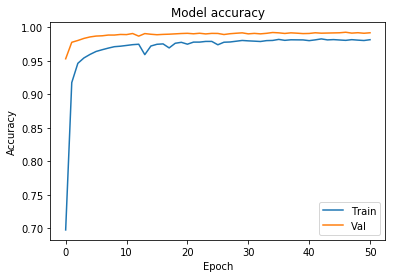

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

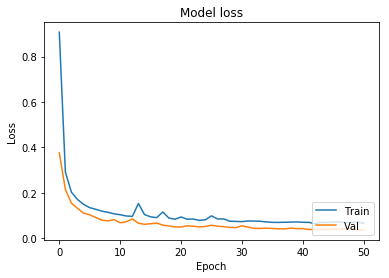

In [14]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [15]:
pred = model.evaluate(xTeste, yTeste)

10000/10000 [==============================] - 5s 476us/step


In [16]:
pred

[0.03384841865974013, 0.9911]